In [1]:
import numpy as np
import os
import math
import pandas as pd
from collections import Counter
import itertools

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD, Adadelta, Adam
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16

%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from confusion_matrix import print_confusion_matrix

In [3]:
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

In [4]:
main_path_word_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_word_emb/"
main_path_char_emb = "C:/Users/svruchtel/Documents/1/Texts classification/LSTM_results_char_emb/"

In [5]:
y_train_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_train_y.npy")
y_train_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_1st_net_train_y.npy")

y_test_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_test_y.npy")
y_test_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_1st_net_test_y.npy")

In [6]:
y_train = y_train_word_emb
y_test = y_test_word_emb

In [7]:
# print(y_test_word_emb.shape)
# print(y_test_char_emb.shape)

In [8]:
# for idx in range(len(y_train_2nd_net_word_emb)):
#     if y_train_2nd_net_word_emb[0].any() != y_train_3rd_net_word_emb[0].any():
#         print("problem")

In [9]:
# for idx in range(len(y_train_word_emb)):
#     if y_train_word_emb[0].any() != y_train_word_emb[0].any():
#         print("problem")

In [10]:
# let's load what we need
X_train_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_train_X.npy")
X_train_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_3rd_net_train_X.npy")
X_train_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_4th_net_train_X.npy")

X_test_2nd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_2nd_net_test_X.npy")
X_test_3rd_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_3rd_net_test_X.npy")
X_test_4th_net_word_emb = np.load(main_path_word_emb + "France_ByMeaningLarge_4th_net_test_X.npy")

X_train_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_3rd_net_train_X_100_chars.npy")
X_train_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_4th_net_train_X_100_chars.npy")

X_test_3rd_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_3rd_net_test_X_100_chars.npy")
X_test_4th_net_char_emb = np.load(main_path_char_emb + "France_ByMeaningLarge_4th_net_test_X_100_chars.npy")

In [11]:
CATEGORIES_COUNT = 2

In [12]:
X_train_2_3 = np.concatenate((X_train_2nd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_2_3 = np.concatenate((X_test_2nd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_2_4 = np.concatenate((X_train_2nd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_2_4 = np.concatenate((X_test_2nd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_3_3 = np.concatenate((X_train_3rd_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_3_3 = np.concatenate((X_test_3rd_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_3_4 = np.concatenate((X_train_3rd_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_3_4 = np.concatenate((X_test_3rd_net_word_emb, X_test_4th_net_char_emb), axis=1)

X_train_4_3 = np.concatenate((X_train_4th_net_word_emb, X_train_3rd_net_char_emb), axis=1)
X_test_4_3 = np.concatenate((X_test_4th_net_word_emb, X_test_3rd_net_char_emb), axis=1)

X_train_4_4 = np.concatenate((X_train_4th_net_word_emb, X_train_4th_net_char_emb), axis=1)
X_test_4_4 = np.concatenate((X_test_4th_net_word_emb, X_test_4th_net_char_emb), axis=1)

## knn_uniform

#### 2_word, 3_char

test accuracy:  0.6807

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1258  471]
 [ 438  810]]
Normalized confusion matrix
[[0.7275882  0.2724118 ]
 [0.35096154 0.64903846]]


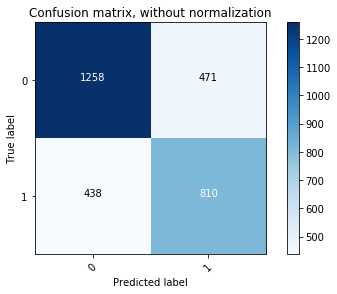

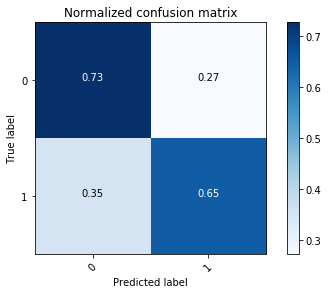


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[148  45]
 [ 61  78]]
Normalized confusion matrix
[[0.76683938 0.23316062]
 [0.43884892 0.56115108]]


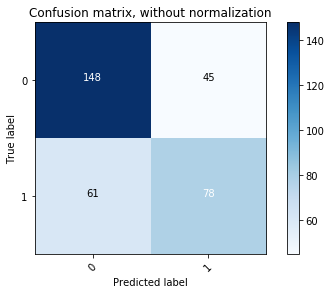

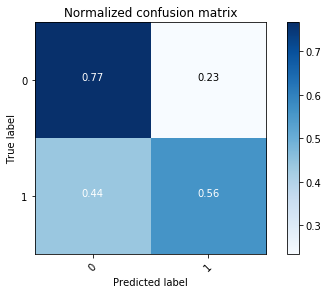

In [13]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)


#### 2 word, 4 char

test accuracy:  0.6687

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1232  497]
 [ 416  832]]
Normalized confusion matrix
[[0.71255061 0.28744939]
 [0.33333333 0.66666667]]


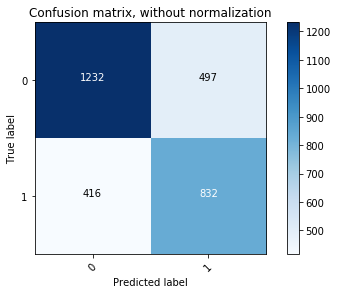

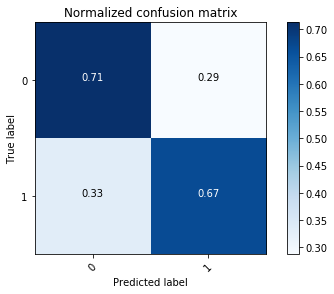


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[145  48]
 [ 62  77]]
Normalized confusion matrix
[[0.75129534 0.24870466]
 [0.44604317 0.55395683]]


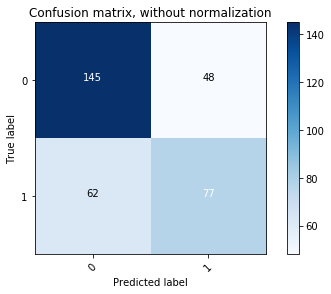

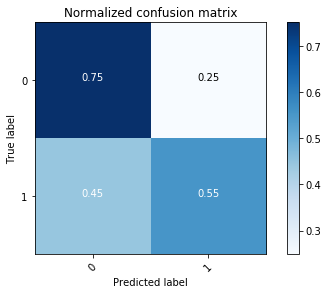

In [14]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.6687

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1264  465]
 [ 439  809]]
Normalized confusion matrix
[[0.73105842 0.26894158]
 [0.35176282 0.64823718]]


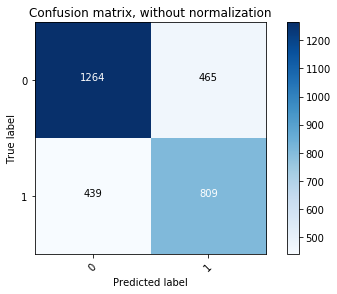

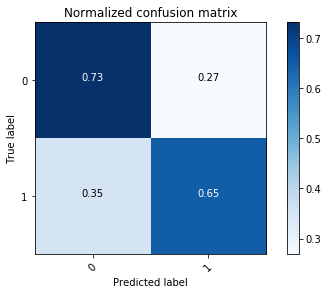


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[146  47]
 [ 63  76]]
Normalized confusion matrix
[[0.75647668 0.24352332]
 [0.45323741 0.54676259]]


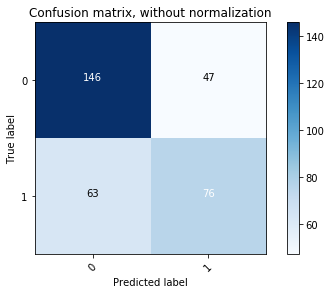

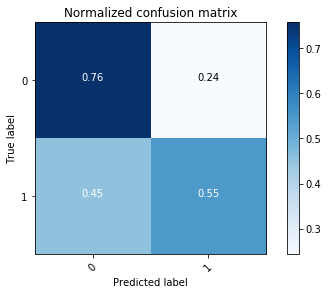

In [15]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.6566

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1242  487]
 [ 428  820]]
Normalized confusion matrix
[[0.7183343  0.2816657 ]
 [0.34294872 0.65705128]]


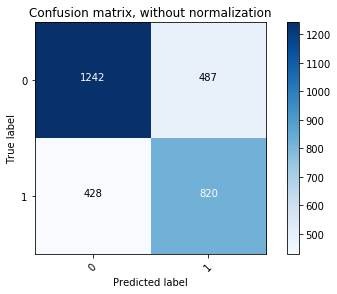

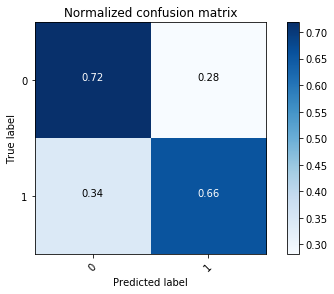


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[143  50]
 [ 64  75]]
Normalized confusion matrix
[[0.74093264 0.25906736]
 [0.46043165 0.53956835]]


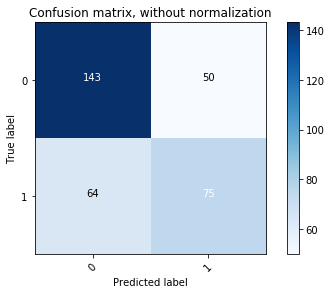

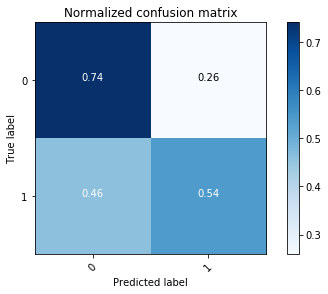

In [16]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.6747

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1286  443]
 [ 461  787]]
Normalized confusion matrix
[[0.74378253 0.25621747]
 [0.36939103 0.63060897]]


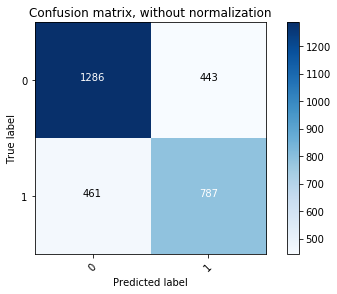

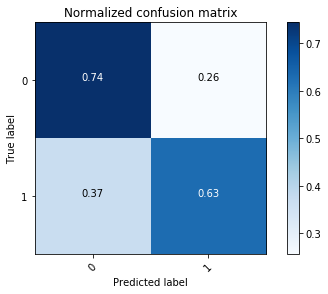


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[148  45]
 [ 63  76]]
Normalized confusion matrix
[[0.76683938 0.23316062]
 [0.45323741 0.54676259]]


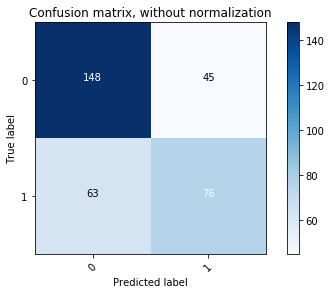

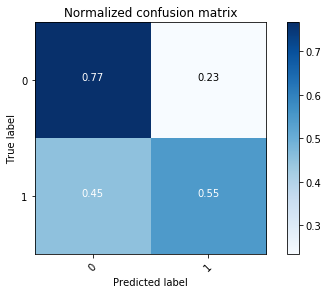

In [17]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.6627

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1249  480]
 [ 443  805]]
Normalized confusion matrix
[[0.72238288 0.27761712]
 [0.35496795 0.64503205]]


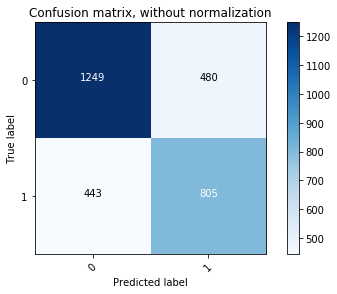

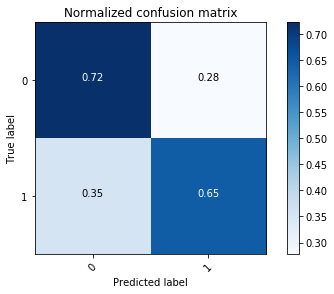


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[145  48]
 [ 64  75]]
Normalized confusion matrix
[[0.75129534 0.24870466]
 [0.46043165 0.53956835]]


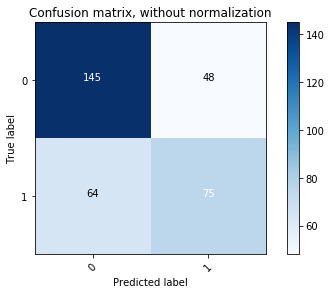

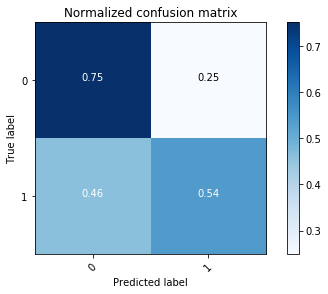

In [18]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_uniform_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_uniform_15.fit(X_train, y_train)

acc_knn_uniform_15 = accuracy_score(y_test, knn_uniform_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_uniform_15)
print("")

y_train_pred = (knn_uniform_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_uniform_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### knn_distance

#### 2 word, 3 char

test accuracy:  0.6657

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


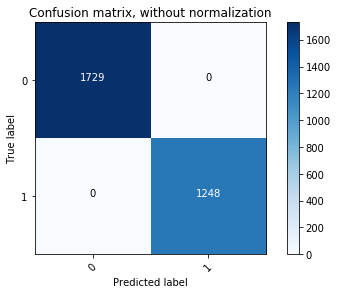

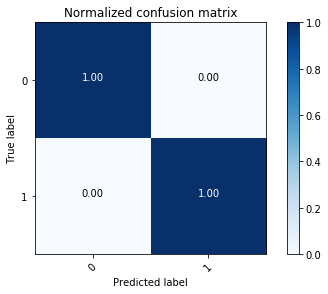


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[139  54]
 [ 57  82]]
Normalized confusion matrix
[[0.72020725 0.27979275]
 [0.41007194 0.58992806]]


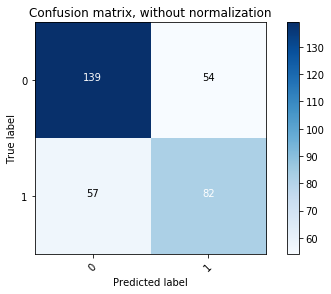

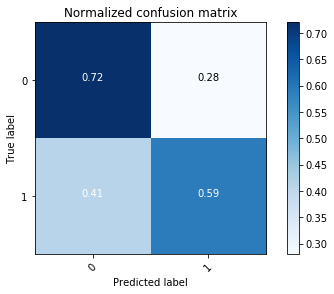

In [19]:
X_train = X_train_2_3
X_test = X_test_2_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.6325

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


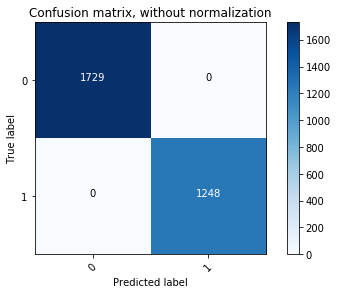

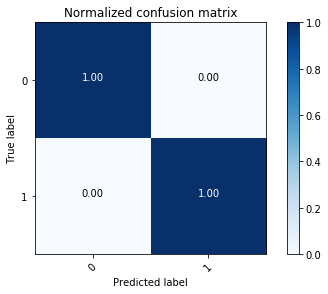


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[137  56]
 [ 66  73]]
Normalized confusion matrix
[[0.70984456 0.29015544]
 [0.47482014 0.52517986]]


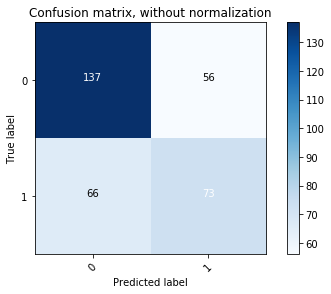

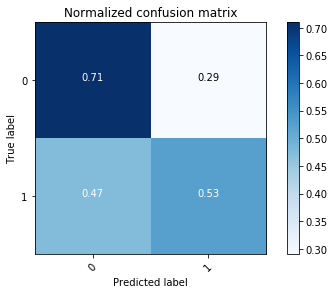

In [20]:
X_train = X_train_2_4
X_test = X_test_2_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.6446

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


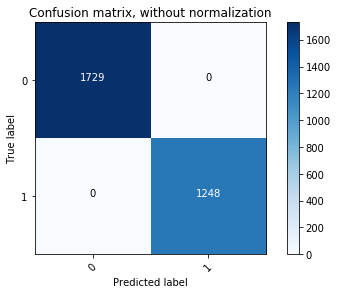

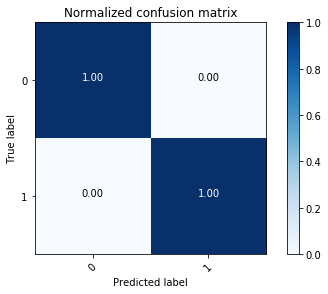


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[138  55]
 [ 63  76]]
Normalized confusion matrix
[[0.71502591 0.28497409]
 [0.45323741 0.54676259]]


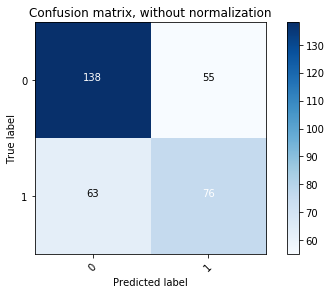

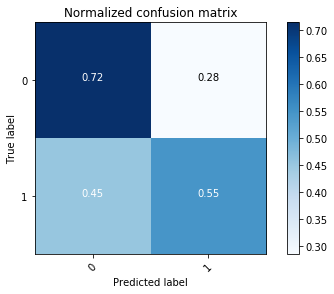

In [21]:
X_train = X_train_3_3
X_test = X_test_3_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.6265

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


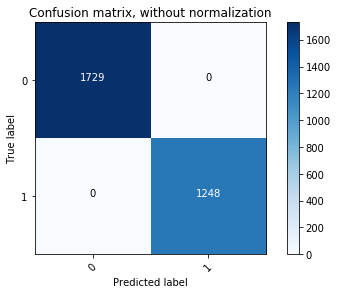

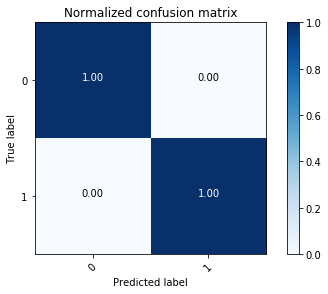


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[138  55]
 [ 69  70]]
Normalized confusion matrix
[[0.71502591 0.28497409]
 [0.49640288 0.50359712]]


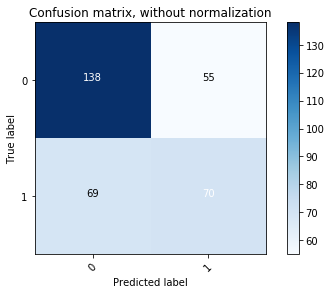

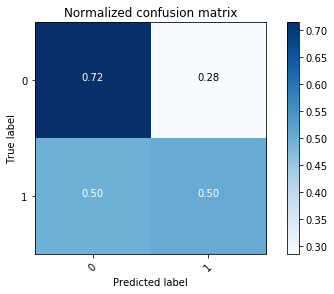

In [22]:
X_train = X_train_3_4
X_test = X_test_3_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.6627

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


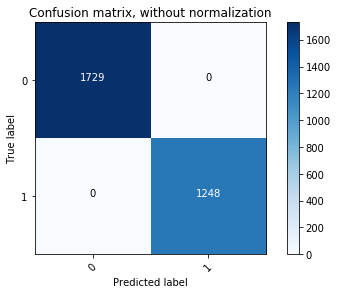

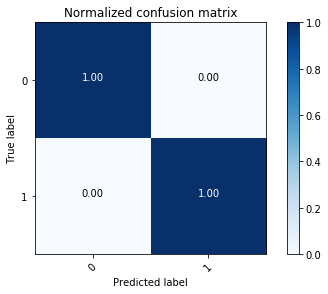


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[138  55]
 [ 57  82]]
Normalized confusion matrix
[[0.71502591 0.28497409]
 [0.41007194 0.58992806]]


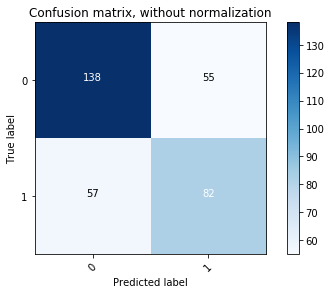

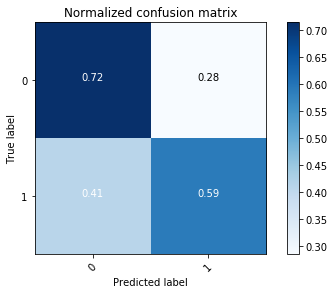

In [23]:
X_train = X_train_4_3
X_test = X_test_4_3

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.6295

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1729    0]
 [   0 1248]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


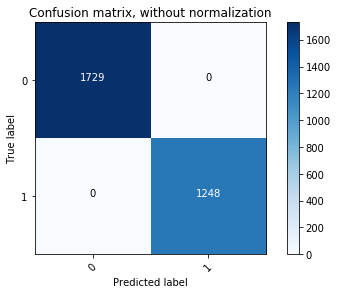

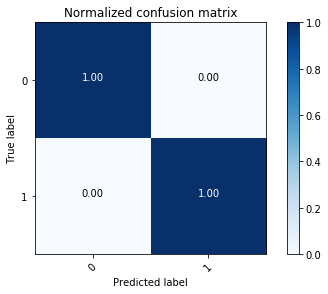


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[139  54]
 [ 69  70]]
Normalized confusion matrix
[[0.72020725 0.27979275]
 [0.49640288 0.50359712]]


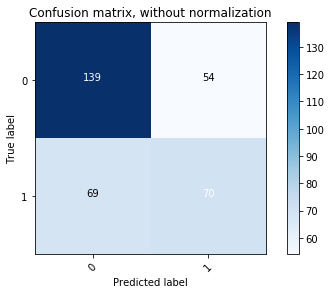

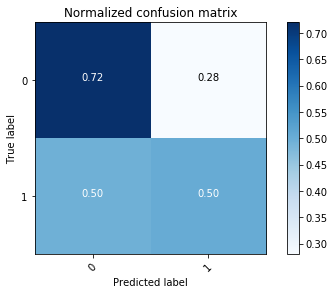

In [24]:
X_train = X_train_4_4
X_test = X_test_4_4

knn_distance_15 = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_distance_15.fit(X_train, y_train)

acc_knn_distance_15 = accuracy_score(y_test, knn_distance_15.predict(X_test))
print("test accuracy:  %.4f" % acc_knn_distance_15)
print("")

y_train_pred = (knn_distance_15.predict(X_train).round()).argmax(axis=1)
y_test_pred = (knn_distance_15.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred.round(), categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred.round(), categories_count=CATEGORIES_COUNT)

### SVM

#### 2 word, 3 char

test accuracy:  0.6928

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 568 1161]
 [  44 1204]]
Normalized confusion matrix
[[0.32851359 0.67148641]
 [0.03525641 0.96474359]]


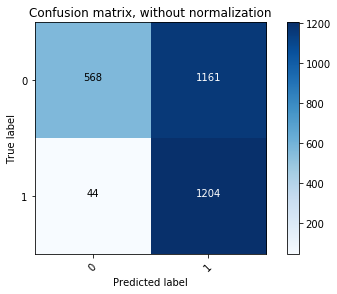

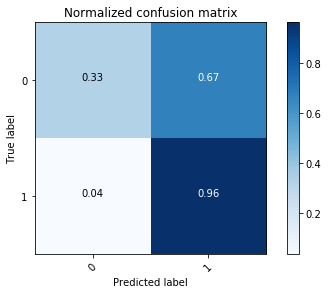


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 95  98]
 [  4 135]]
Normalized confusion matrix
[[0.49222798 0.50777202]
 [0.02877698 0.97122302]]


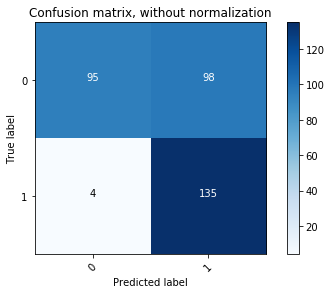

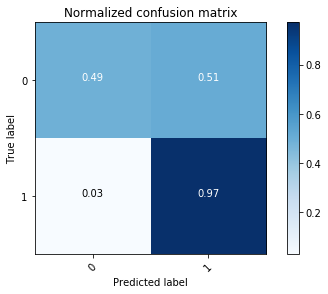

In [25]:
X_train = X_train_2_3
X_test = X_test_2_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 2 word, 4 char

test accuracy:  0.6898

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 553 1176]
 [  32 1216]]
Normalized confusion matrix
[[0.31983806 0.68016194]
 [0.02564103 0.97435897]]


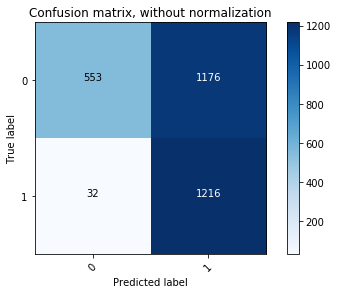

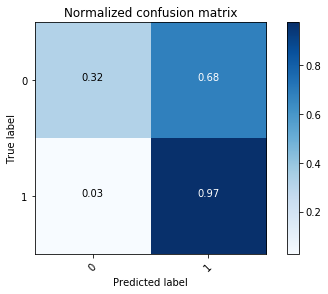


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 93 100]
 [  3 136]]
Normalized confusion matrix
[[0.48186528 0.51813472]
 [0.02158273 0.97841727]]


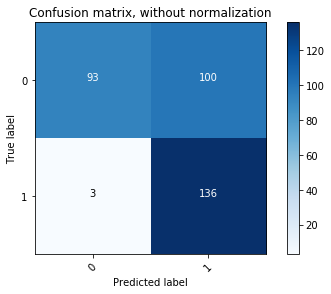

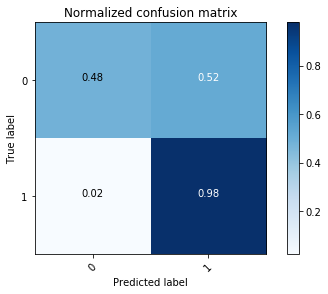

In [26]:
X_train = X_train_2_4
X_test = X_test_2_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 3 char

test accuracy:  0.6958

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 554 1175]
 [  49 1199]]
Normalized confusion matrix
[[0.32041643 0.67958357]
 [0.03926282 0.96073718]]


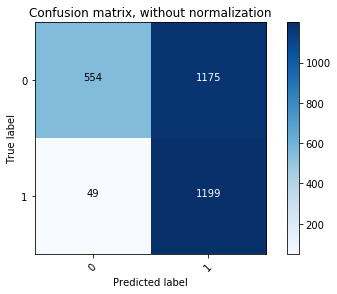

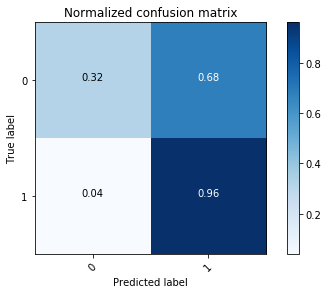


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 96  97]
 [  4 135]]
Normalized confusion matrix
[[0.49740933 0.50259067]
 [0.02877698 0.97122302]]


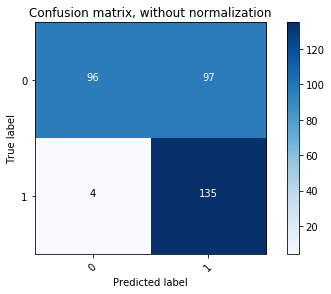

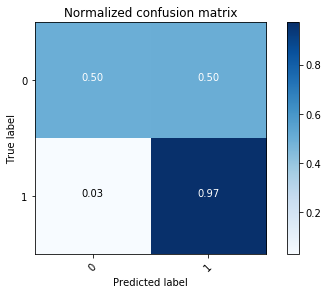

In [27]:
X_train = X_train_3_3
X_test = X_test_3_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 3 word, 4 char

test accuracy:  0.7018

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 551 1178]
 [  38 1210]]
Normalized confusion matrix
[[0.31868132 0.68131868]
 [0.03044872 0.96955128]]


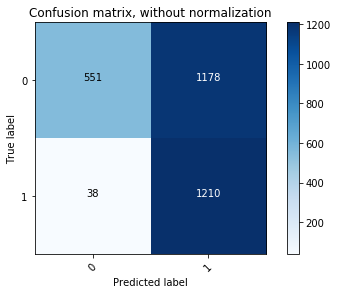

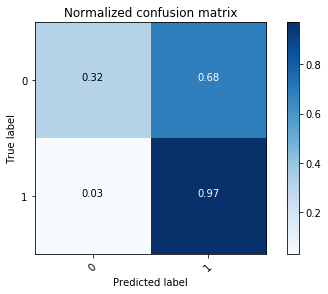


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[ 97  96]
 [  3 136]]
Normalized confusion matrix
[[0.50259067 0.49740933]
 [0.02158273 0.97841727]]


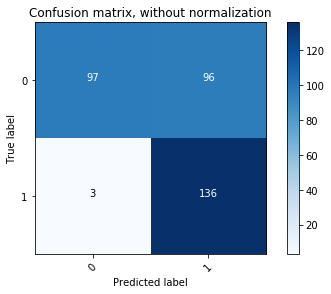

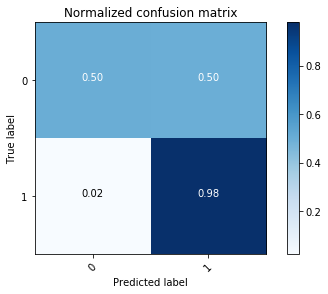

In [28]:
X_train = X_train_3_4
X_test = X_test_3_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 3 char

test accuracy:  0.7018

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[1073  656]
 [ 482  766]]
Normalized confusion matrix
[[0.62058994 0.37941006]
 [0.38621795 0.61378205]]


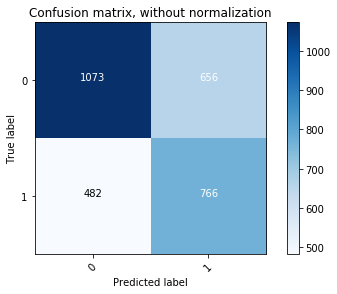

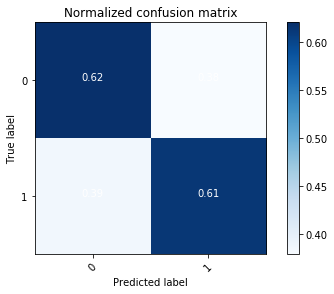


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[146  47]
 [ 52  87]]
Normalized confusion matrix
[[0.75647668 0.24352332]
 [0.37410072 0.62589928]]


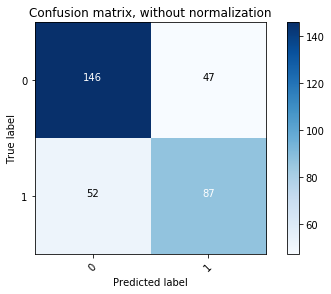

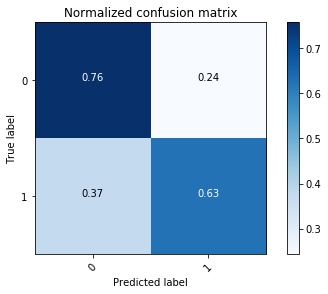

In [29]:
X_train = X_train_4_3
X_test = X_test_4_3

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

#### 4 word, 4 char

test accuracy:  0.7139

TRAIN CONFUSION MATRIX
Confusion matrix, without normalization
[[ 577 1152]
 [  67 1181]]
Normalized confusion matrix
[[0.33371891 0.66628109]
 [0.0536859  0.9463141 ]]


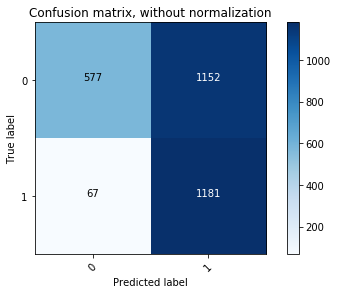

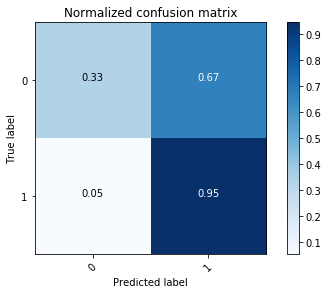


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[105  88]
 [  7 132]]
Normalized confusion matrix
[[0.54404145 0.45595855]
 [0.05035971 0.94964029]]


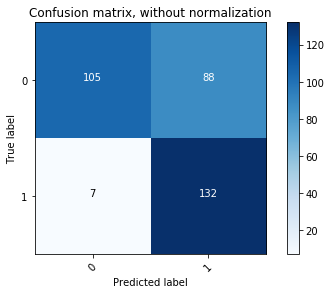

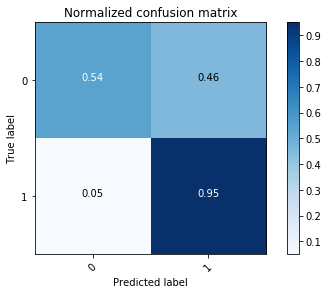

In [30]:
X_train = X_train_4_4
X_test = X_test_4_4

svm = SVC(kernel='rbf')
svm.fit(X_train, (y_train.round()).argmax(axis=1))

acc_svm = accuracy_score((y_test.round()).argmax(axis=1), svm.predict(X_test))
print("test accuracy:  %.4f" % acc_svm)
print("")

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

### meta_net

#### 2 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 314us/step - loss: 0.627

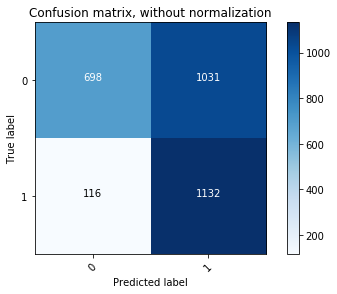

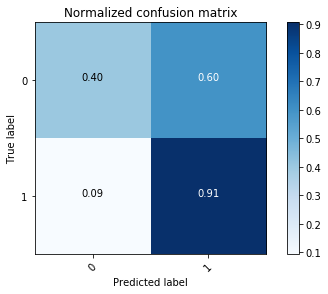


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[108  85]
 [ 12 127]]
Normalized confusion matrix
[[0.55958549 0.44041451]
 [0.08633094 0.91366906]]


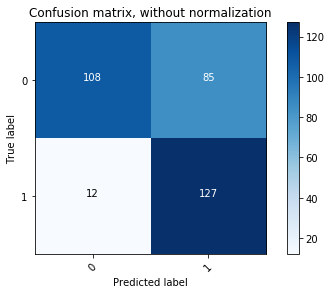

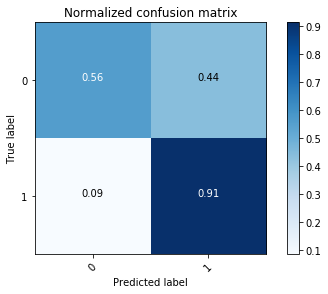

Wall time: 7.57 s


In [31]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_3
X_test = X_test_2_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_2_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_2_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 2 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 219us/step - loss: 0.617

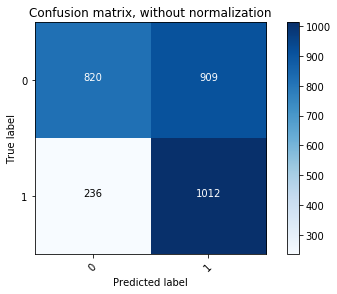

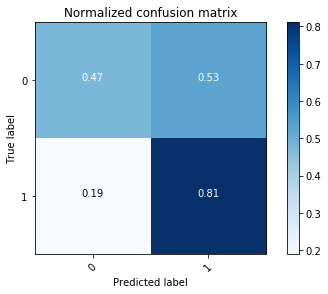


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[119  74]
 [ 27 112]]
Normalized confusion matrix
[[0.61658031 0.38341969]
 [0.1942446  0.8057554 ]]


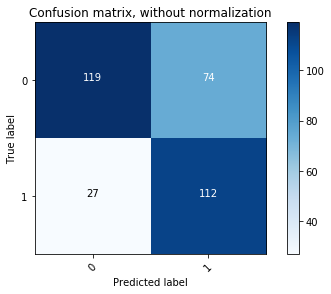

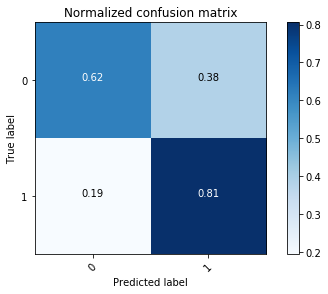

Wall time: 7.22 s


In [32]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_2_4
X_test = X_test_2_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_2_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_2_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               2560      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 216us/step - loss: 0.629

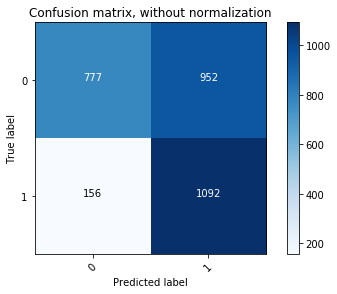

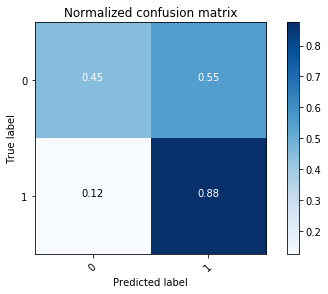


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[113  80]
 [ 20 119]]
Normalized confusion matrix
[[0.58549223 0.41450777]
 [0.14388489 0.85611511]]


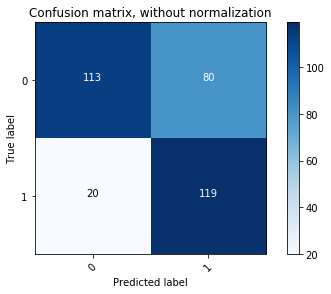

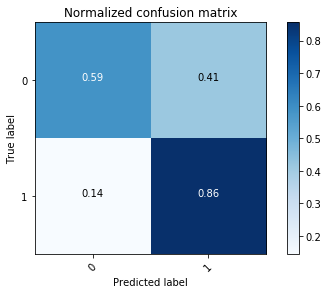

Wall time: 5.95 s


In [33]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_3
X_test = X_test_3_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaning/meta_net_train_3_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaning/meta_net_test_3_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 3 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 239us/step - loss: 0.620

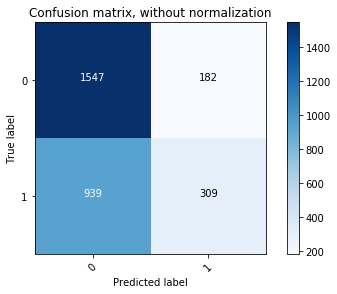

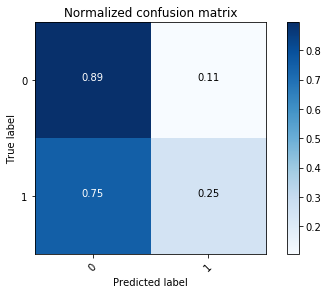


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[189   4]
 [104  35]]
Normalized confusion matrix
[[0.97927461 0.02072539]
 [0.74820144 0.25179856]]


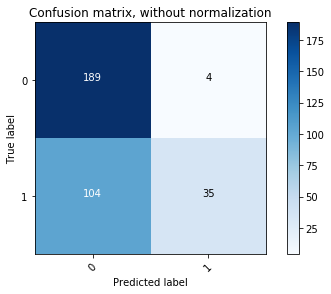

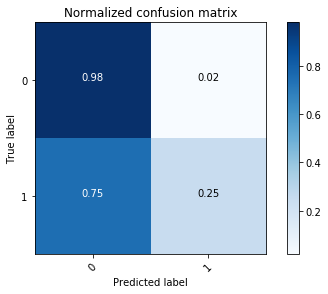

Wall time: 4.36 s


In [34]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_3_4
X_test = X_test_3_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_3_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_3_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 3 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 241us/step - loss: 0.631

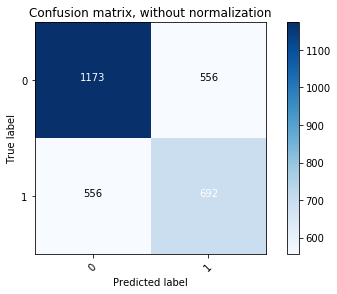

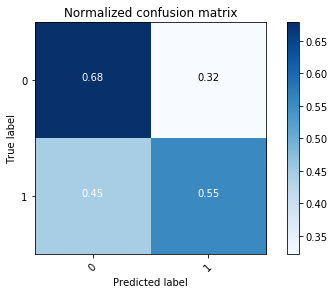


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[154  39]
 [ 63  76]]
Normalized confusion matrix
[[0.79792746 0.20207254]
 [0.45323741 0.54676259]]


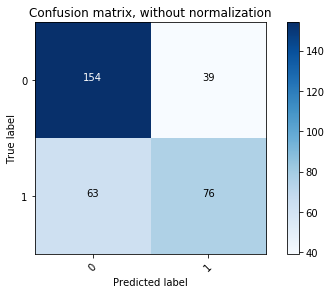

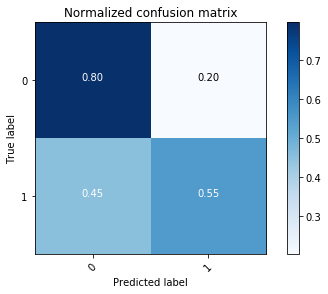

Wall time: 4.08 s


In [35]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_3
X_test = X_test_4_3

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_4_3.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_4_3.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)

#### 4 word, 4 char

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 514       
Total params: 134,402
Trainable params: 134,402
Non-trainable params: 0
_________________________________________________________________
None
Train on 2977 samples, validate on 332 samples
Epoch 1/300
2977/2977 [==============================] - 1s 252us/step - loss: 0.615

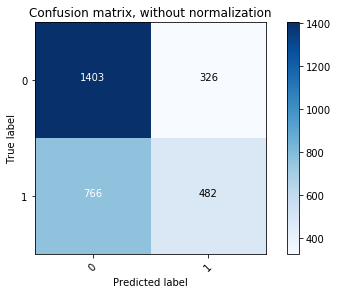

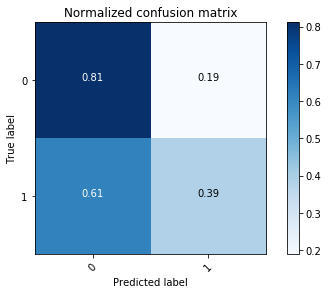


TEST CONFUSION MATRIX
Confusion matrix, without normalization
[[179  14]
 [ 85  54]]
Normalized confusion matrix
[[0.92746114 0.07253886]
 [0.61151079 0.38848921]]


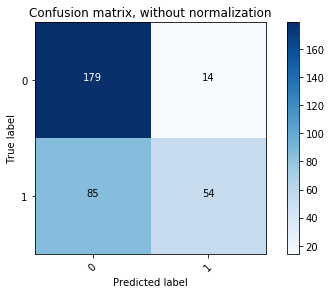

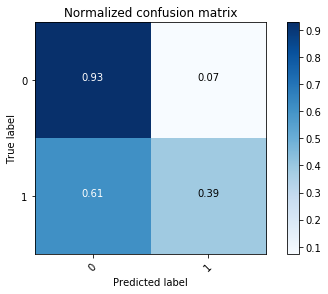

Wall time: 4.58 s


In [36]:
%%time
categories_count = CATEGORIES_COUNT

X_train = X_train_4_4
X_test = X_test_4_4

meta_net = Sequential()
meta_net.add(Dense(512, input_shape=X_train[0].shape))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(256))
meta_net.add(Dropout(0.5))
meta_net.add(Dense(categories_count, activation='softmax'))
meta_net.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(meta_net.summary())
    
callback = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto')
history_callback = meta_net.fit(X_train, y_train, validation_data=(X_test, y_test), 
                                epochs=300, batch_size=100, callbacks=[callback])

test_scores = meta_net.evaluate(X_test, y_test, verbose=0)
    
print("test accuracy:  %.4f" % test_scores[1])
print("")

y_train_pred = (meta_net.predict(X_train).round()).argmax(axis=1)
y_test_pred = (meta_net.predict(X_test).round()).argmax(axis=1)

print("TRAIN CONFUSION MATRIX")
print_confusion_matrix(X_train, (y_train.round()).argmax(axis=1), y_train_pred, categories_count=CATEGORIES_COUNT)

print("")
print("TEST CONFUSION MATRIX")
print_confusion_matrix(X_test, (y_test.round()).argmax(axis=1), y_test_pred, categories_count=CATEGORIES_COUNT)

# and than write results info files
file_path_train = "./Stacking_Results_France_ByMeaningLarge/meta_net_train_4_4.npy"
file_path_test = "./Stacking_Results_France_ByMeaningLarge/meta_net_test_4_4.npy"

np.save(file_path_train, y_train_pred)
np.save(file_path_test, y_test_pred)